# Practice #1. "Trend analysis"

This notebook is dedicated to:
- Time series smoothing
- Trend estimation and extraction

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## 0. Data reading and visualization

Please, specify path to data

In [31]:
path_to_datafile = "../data/opsd_germany_daily.csv"

In [32]:
# data reading to pandas.DataFrame
df = pd.read_csv(path_to_datafile)

Please, rename time column to `ds` and data column to `y`(you can use `df.rename`) . If use dataset with multiple features select only one and drop NaN values

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [34]:
# your code here
df.rename(columns={"Date": "ds", "Consumption": "y"}, inplace=True)
df=df.drop(columns=['Wind', 'Solar', 'Wind+Solar'])

Convert date column to datetime format and set as index

In [35]:
df["ds"] = pd.to_datetime(df["ds"])
df.set_index("ds", inplace=True)

Number of data data points:

In [36]:
df.shape[0]

4383

Print slice of the timeseries:

In [37]:
df.head()

,y
ds,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


Let's plot the data

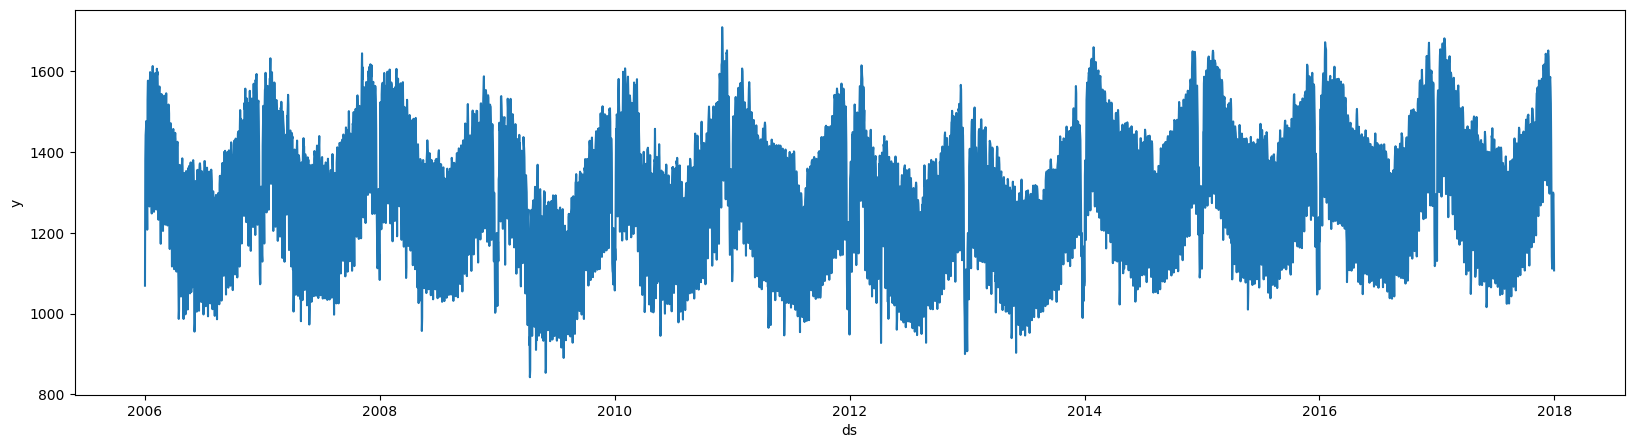

In [38]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
plt.xlabel("ds")
plt.plot(df)

## 1. Timeseries smoothing

### 1.1 Moving average

Pandas provides method `pandas.DataFrame.rolling` for calculating moving average.<br/>There multiple ways to calculate moving average:

#### Centered moving average

$$
    x[t] = \frac{x[t - \lfloor n / 2 \rfloor] + ... + x[t  - 1] + ... + x[t] + x[t + 1] + ... + x[t + \lfloor n / 2 \rfloor]}{n}
$$
where $n$ - window size

Please, calculate centered moving average.

In [39]:
# your code here
df_centered = df.rolling( window=12, center= True).mean()

#### Trailing moving average

$$
x[t] = \frac{(x[t - n ] + ... + x[t  - 1] + x[t])}{n} 
$$
where $n$ - window size

Please, calculate trailing moving average.

In [40]:
# your code here
df_trailing = df.rolling( window=12).mean()

Smoothed data visualization and comparision

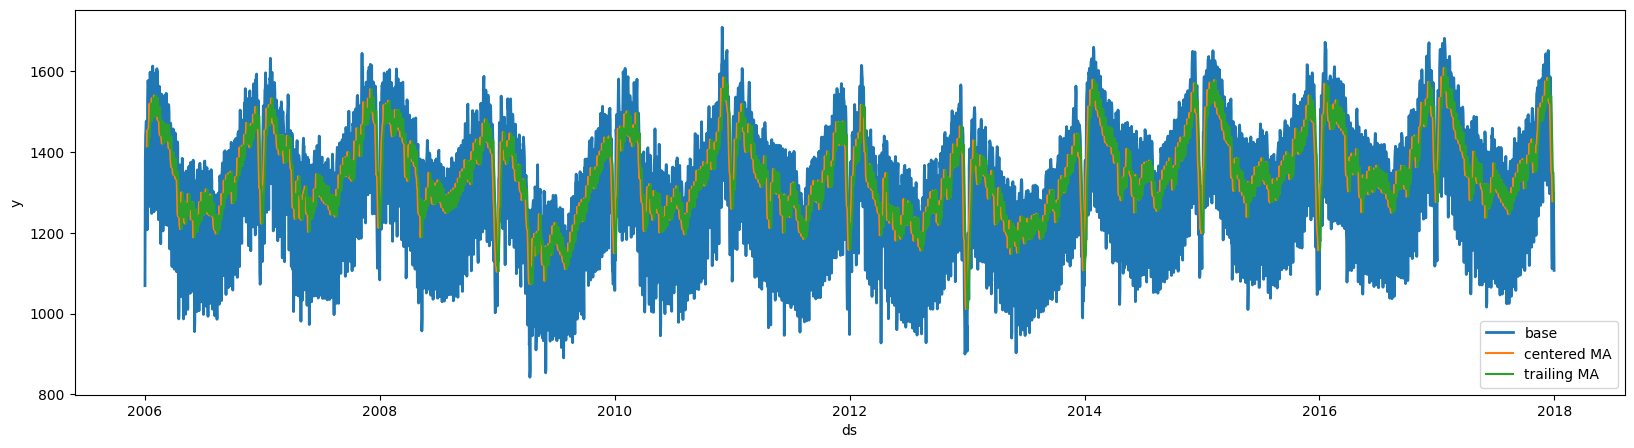

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_centered, label='centered MA')
plt.plot(df_trailing, label='trailing MA')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Please, smooth the data using different window sizes and compare results

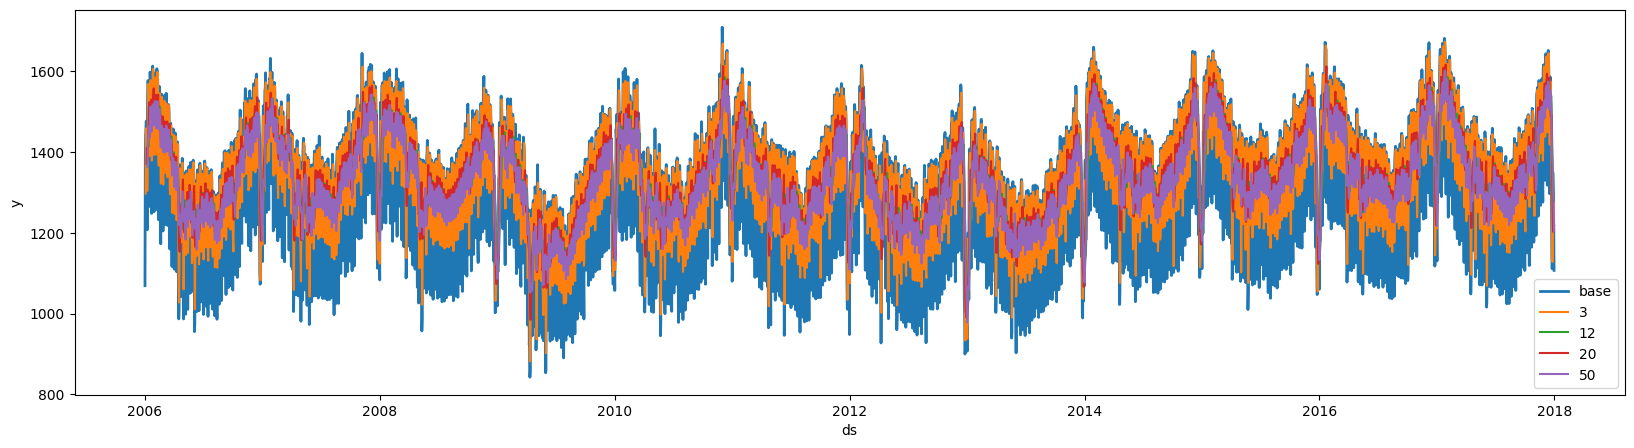

In [42]:
# your code here
df_6 = df.rolling( window=6).mean()
df_9 = df.rolling( window=9).mean()
df_3 = df.rolling( window=3).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')

plt.plot(df_3, label='3')
plt.plot(df_trailing, label='12')
plt.plot(df_6, label='20')
plt.plot(df_9, label='50')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

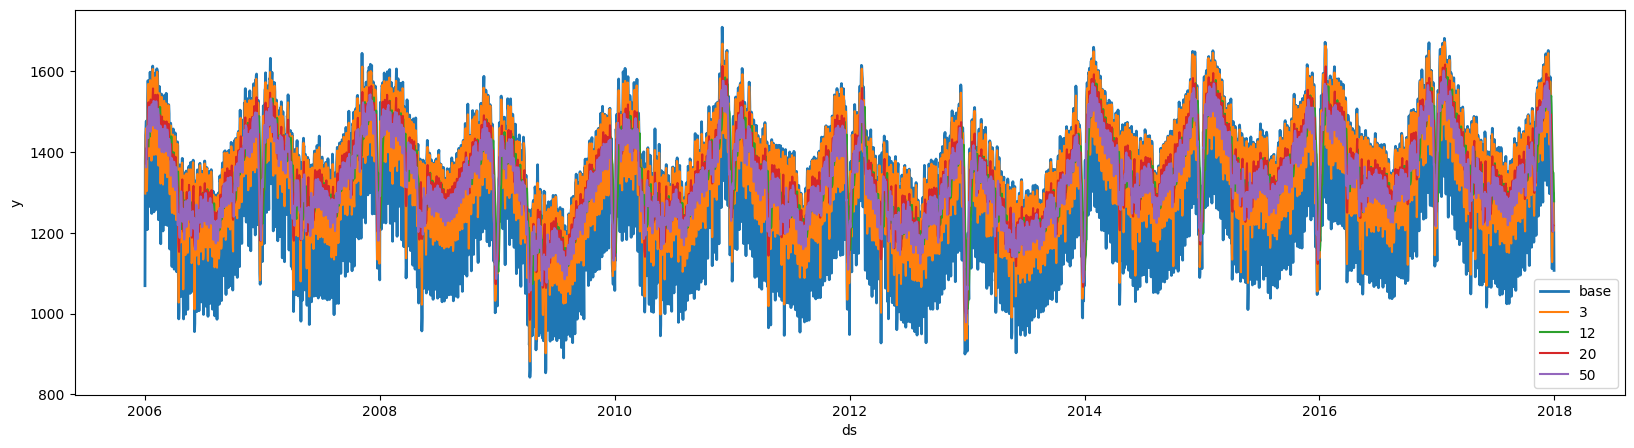

In [43]:
# your code here
df_6 = df.rolling( window=6, center=True).mean()
df_9 = df.rolling( window=9, center=True).mean()
df_3 = df.rolling( window=3, center=True).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')

plt.plot(df_3, label='3')
plt.plot(df_trailing, label='12')
plt.plot(df_6, label='20')
plt.plot(df_9, label='50')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Questions:<br>
- How the window size influence smoothed time-series?

A larger window size averages over more data points, resulting in greater smoothing of the time series.

### 1.2 Exponential smoothing

Pandas provides method `pandas.DataFrame.ewm` for exponential smoothing.

Please, calculate exponential smoothing.

In [44]:
# your code here
df_exp = df.ewm(alpha=0.3).mean()

Also, statsmodels liblary provides methods for calculation exponential smoothing `statsmodels.tsa.holtwinters.ExponentialSmoothing`.<br>
Please, uase also the statsmodels method with the same alpha.

In [45]:
# your code here
model = ExponentialSmoothing(df['y'], trend=None, seasonal=None)
model = model.fit(smoothing_level=0.3)
df_exp_statm = model.fittedvalues


Results of the both methods shold be identical 

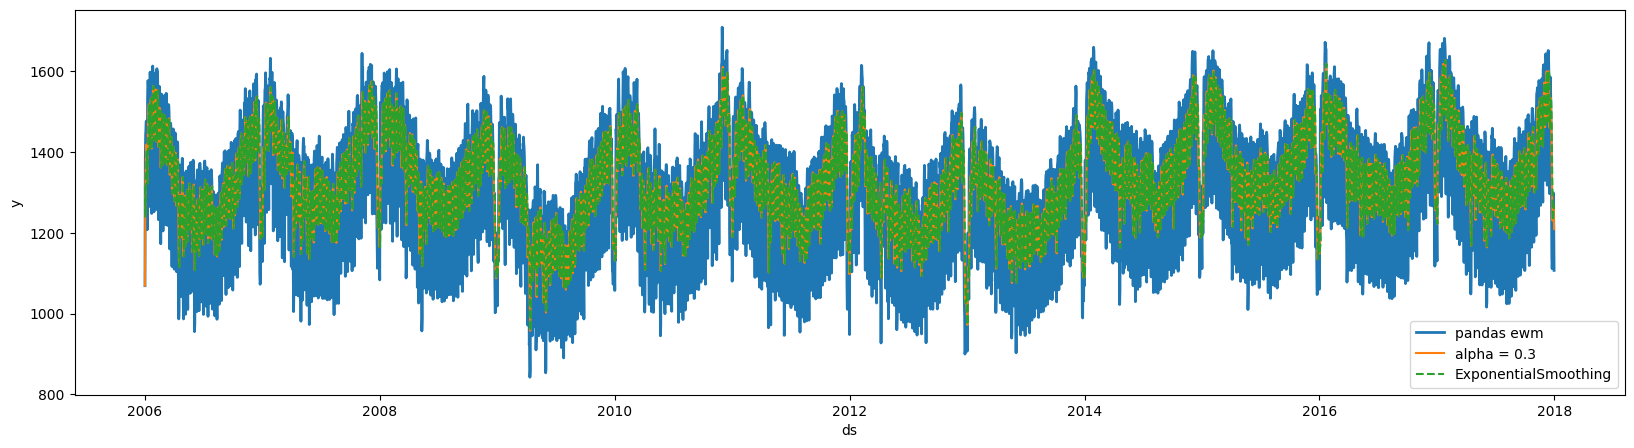

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='pandas ewm')
plt.plot(df_exp, label='alpha = 0.3')
plt.plot(df_exp_statm, "--", label='ExponentialSmoothing')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Please, smooth the data using different alpha and compare results

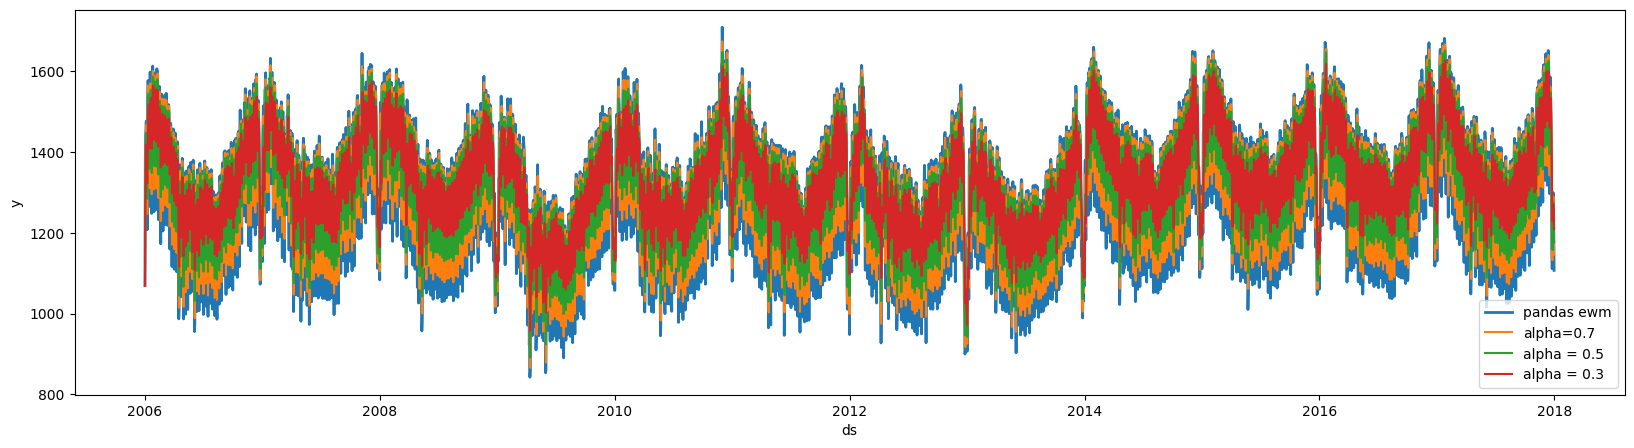

In [47]:
# your code here
df_alpha_05 = df.ewm(alpha=0.5).mean()
df_alpha_07 = df.ewm(alpha=0.7).mean()
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='pandas ewm')
plt.plot(df_alpha_07, label='alpha=0.7')
plt.plot(df_alpha_05, label='alpha = 0.5')
plt.plot(df_exp, label='alpha = 0.3')


plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Questions:<br>
- How the alpha coefficient influence smoothed time-series?

A higher alpha (closer to 1) gives more weight to recent data, making the series more responsive to changes. A lower alpha (closer to 0) smooths the series more, making it less sensitive to short-term fluctuations.

### 1.3 Double exponential smoothing

`statsmodels.tsa.holtwinters.ExponentialSmoothing` alows to calculate double and triple exponential smooothing also.<br>
Please, calculate double exponential smoothing.

In [48]:
# your code here
model_dexp = ExponentialSmoothing(df, trend='add', seasonal=None)
model_dexp_03 = model_dexp.fit(smoothing_level=0.3)
df_dexp = df.copy()
df_dexp['y'] = model_dexp_03.fittedvalues

# df_dexp = ...

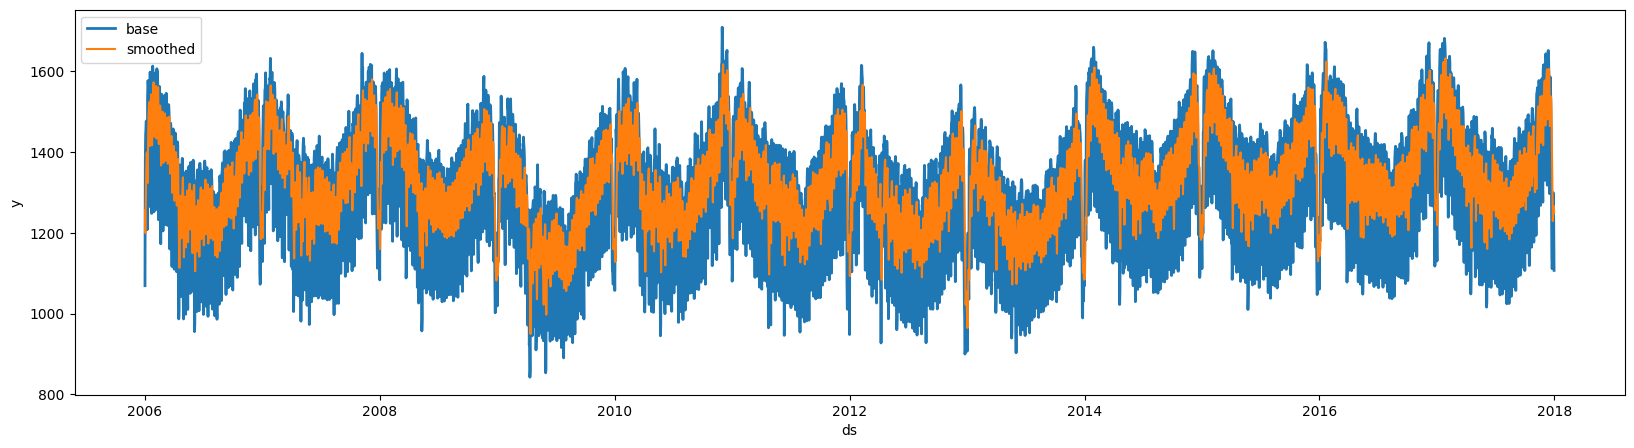

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(df_dexp, label='smoothed')
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Please, smooth the data using different alpha and beta coefficients and compare results. Also try to use different types of trend("add", "mul").

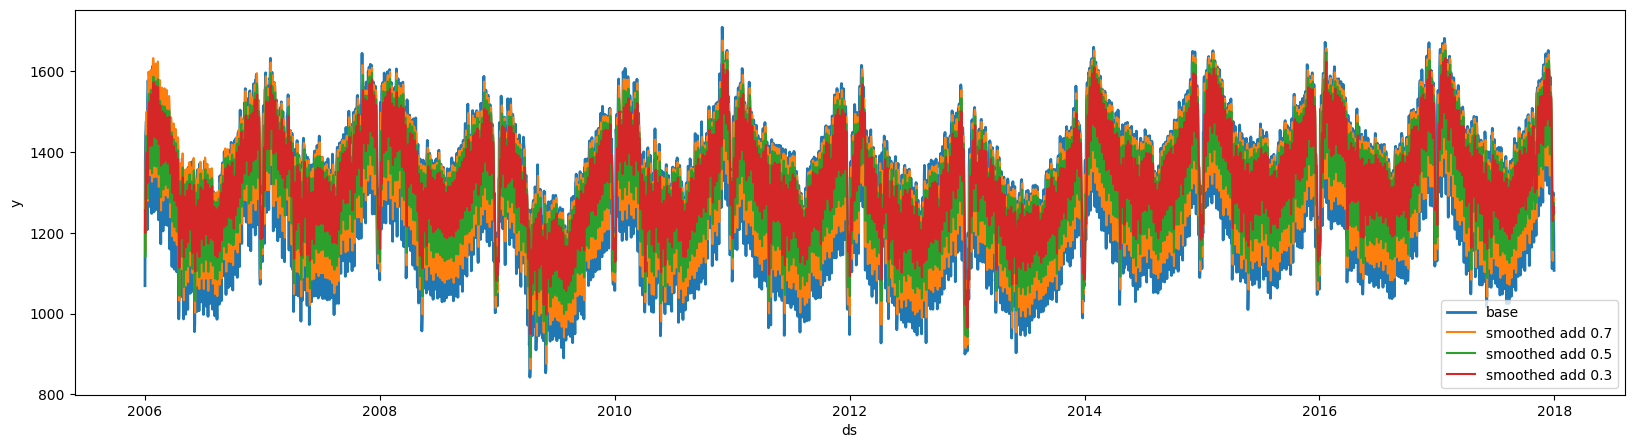

In [50]:
# your code here
model_dexp_05 = model_dexp.fit(smoothing_level=0.5)
model_dexp_07 = model_dexp.fit(smoothing_level=0.7)

plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_07.fittedvalues, label='smoothed add 0.7')
plt.plot(model_dexp_05.fittedvalues, label='smoothed add 0.5')
plt.plot(model_dexp_03.fittedvalues, label='smoothed add 0.3')


plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

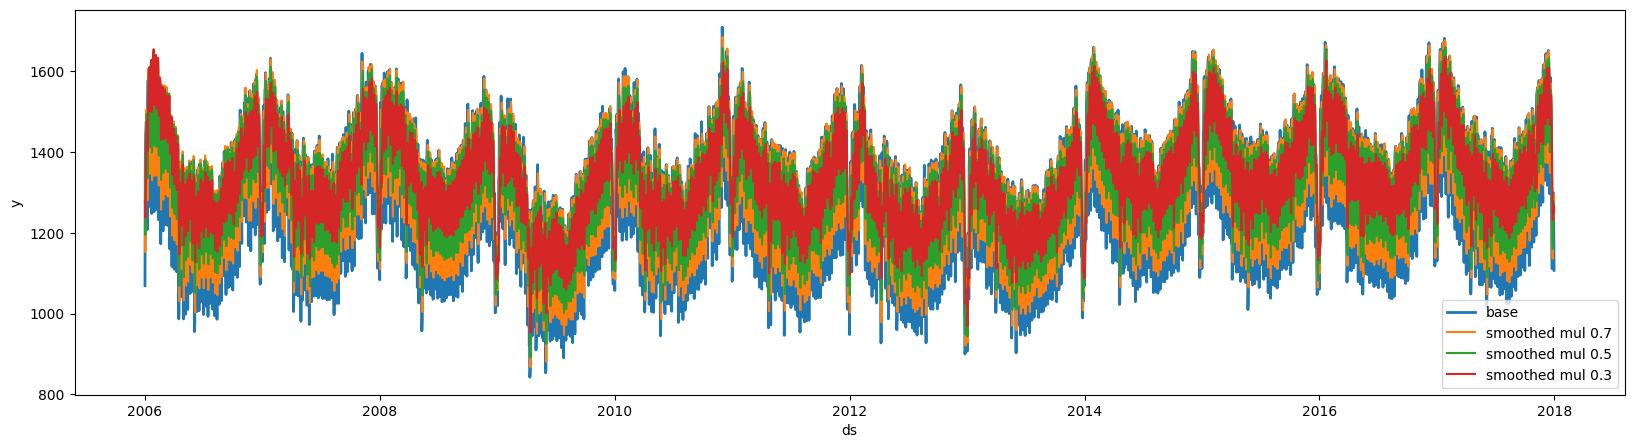

In [51]:
# your code here
model_dexp_mul = ExponentialSmoothing(df, trend='mul', seasonal=None)
model_dexp_mul_03 = model_dexp_mul.fit(smoothing_level=0.3)
model_dexp_mul_05 = model_dexp_mul.fit(smoothing_level=0.5)
model_dexp_mul_07 = model_dexp_mul.fit(smoothing_level=0.7)

plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_mul_07.fittedvalues, label='smoothed mul 0.7')
plt.plot(model_dexp_mul_05.fittedvalues, label='smoothed mul 0.5')
plt.plot(model_dexp_mul_03.fittedvalues, label='smoothed mul 0.3')


plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

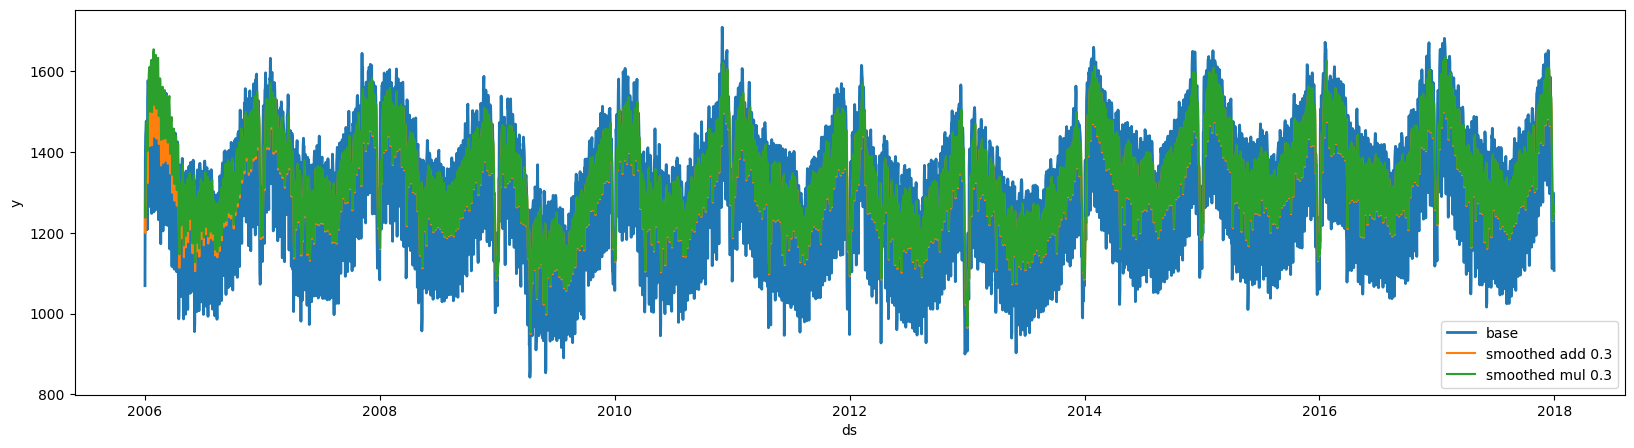

In [52]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(model_dexp_03.fittedvalues, label='smoothed add 0.3')
plt.plot(model_dexp_mul_03.fittedvalues, label='smoothed mul 0.3')

plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

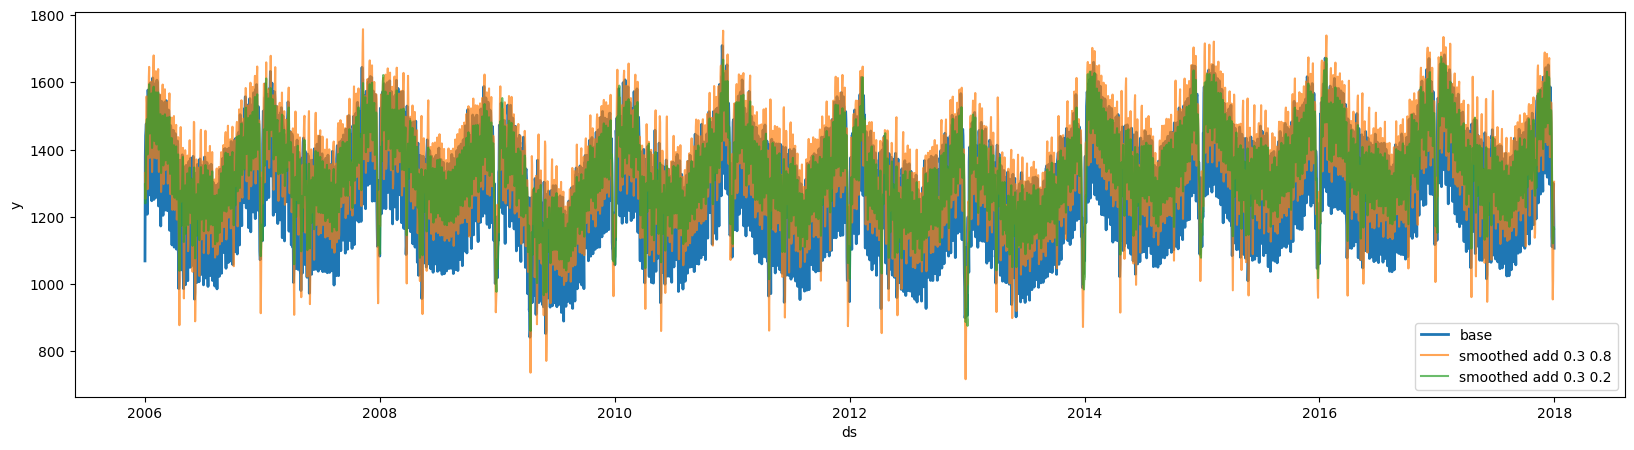

In [53]:
model_dexp_add_03_02 = model_dexp.fit(smoothing_level=0.3, smoothing_trend=0.2) # smoothing slope is beta
model_dexp_add_03_08 = model_dexp.fit(smoothing_level=0.3, smoothing_trend=0.8)
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')

plt.plot(model_dexp_add_03_08.fittedvalues, label='smoothed add 0.3 0.8', alpha=0.7)
plt.plot(model_dexp_add_03_02.fittedvalues, label='smoothed add 0.3 0.2', alpha=0.7)
plt.ylabel("y")
plt.xlabel("ds")
plt.legend()

Questions:<br>
- How the beta coefficient influence smoothed time-series?

Beta controls how much the model follows changes in the trend. A high beta means it reacts quickly to changes, while a low beta makes it follow the trend more slowly and smoothly.

- Is there a relationship between coefficients?

Yes, beta and alpha are related. Alpha adjusts for the current data, and beta adjusts for the trend over time. They work together to make predictions smoother.

## 2. Trend extraction

### 2.1 Linear regression

One of the simplest ways to estimate trend is the Linear Regression model.<br>
Better is to smooth time-series before applying the model using one of the methods above. You can use `sklearn.linear_model.LinearRegression`.

In [54]:
# your code here
model = LinearRegression()
time_numeric = (df.index - df.index[0]).days.to_numpy().reshape(-1, 1)
model.fit(time_numeric, model_dexp_05.fittedvalues)
trend = model.predict(time_numeric)

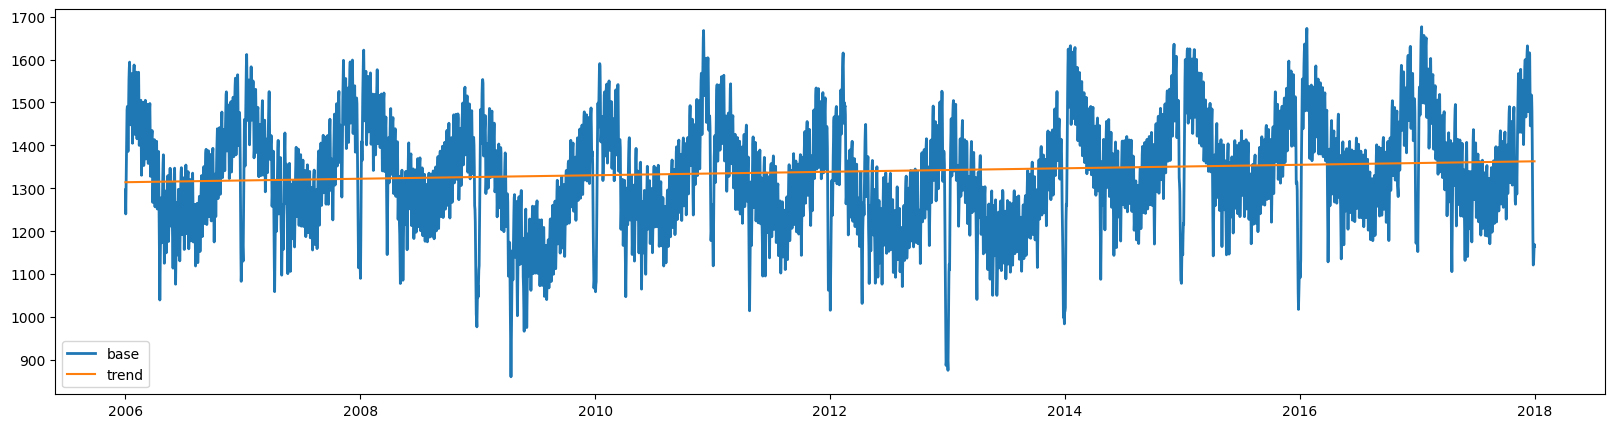

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, model_dexp_add_03_02.fittedvalues, linewidth=2, label='base')
plt.plot(df.index, trend, label='trend')
plt.legend()

### 2.2 Time series decomposition

Also `statsmodels` liblary provides method for time-series decomposition - `statsmodels.tsa.seasonal.seasonal_decompose`. Please, extrat trend using this method.

In [56]:
# your code here
trend = seasonal_decompose(df).trend

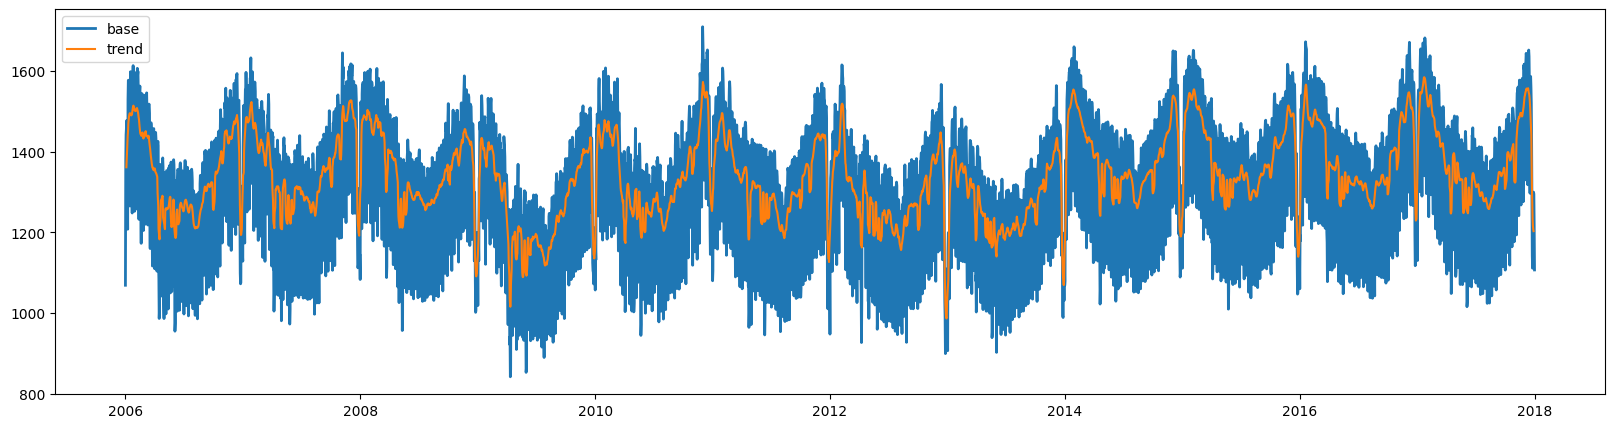

In [57]:
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(trend, label='trend')
plt.legend()

Plsease, find difference between trends extracted from smoothed and not smoothed timeseries.

432.25213218475864


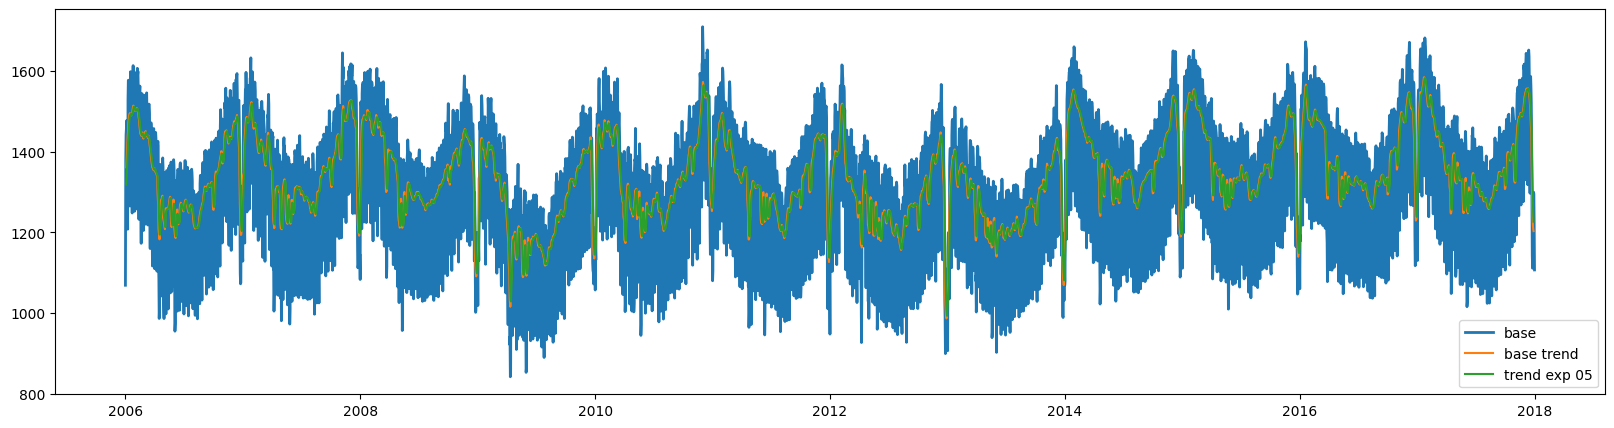

In [58]:
# your code here
trend_exp_05 = seasonal_decompose(model_dexp_05.fittedvalues).trend
plt.figure(figsize=(20, 5))
plt.plot(df, linewidth=2, label='base')
plt.plot(trend, label='base trend')
plt.plot(trend_exp_05, label='trend exp 05')
plt.legend()

print(mean_squared_error(trend.dropna(), trend_exp_05.dropna()))